<a href="https://colab.research.google.com/github/zkiokko/AI/blob/main/KernelPolinomial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import cm, pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
import time
from sklearn import svm
from sklearn.model_selection import train_test_split


def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    return X,y

def tune_parameter(parname, parvalues ,cf ,k_fold,X,y):
    acc=[]
    for i in range(len(parvalues)):
        cf.set_params(**{parname:parvalues[i]})
        acc.append(cross_val_score(cf, X, y, cv=k_fold,scoring="accuracy"))
    return acc

In [ ]:
X,y=load_dataset(.5)
X1=X.drop(X.columns[np.std(X)==0.0],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=.20, random_state=56)
;

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


''

In [4]:
c=[0.1 ,1 ]
cl = svm.SVC(kernel='poly',degree=2, C=1)
start = time.time()
t_acc=tune_parameter("C",c,cl,10,X_train,y_train)
end = time.time()
print("10-way cross validation mean time "+str(int((end - start)/len(c)))+"s")

10-way cross validation mean time 913s


In [5]:
from numpy import mean
mean(t_acc,axis=1)

array([0.94260714, 0.969     ])

In [6]:
c.append(10)
start = time.time()
t_acc.append(tune_parameter("C",[10],cl,10,X_train,y_train)[0])
end = time.time()
print("10-way cross validation mean time "+str(int((end - start)))+"s")

10-way cross validation mean time 472s


In [7]:
mean(t_acc,axis=1)

array([0.94260714, 0.969     , 0.97375   ])

In [10]:
c.append(100)
start = time.time()
t_acc.append(tune_parameter("C",[100],cl,10,X_train,y_train)[0])
end = time.time()
print("10-way cross validation mean time "+str(int((end - start)))+"s")
mean(t_acc,axis=1)

10-way cross validation mean time 472s


array([0.94260714, 0.969     , 0.97375   , 0.97392857])

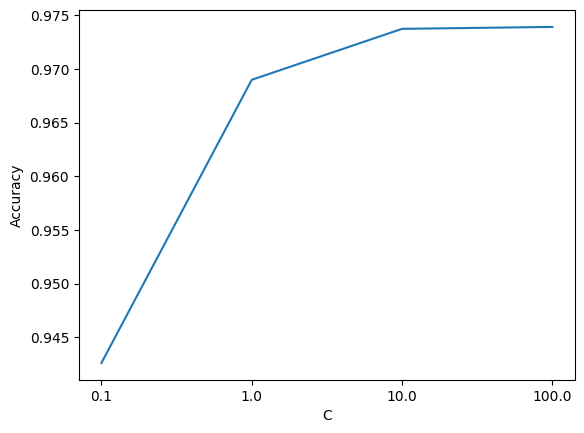

In [11]:
from numpy import arange, argsort,sort
fig, ax = plt.subplots()
t_accp=mean(t_acc,axis=1)
x_place=arange(len(t_accp))
[argsort(c)]
ax.plot(t_accp[argsort(c)])
cc=sort(c)
plt.xticks(x_place, cc)
ax.set(xlabel='C',ylabel="Accuracy")

plt.show()


Best Value for C=100

In [12]:
start=time.time()
cl = svm.SVC(kernel='poly',degree=2, C=100)
cl.fit(X_train,y_train)
end = time.time()
print("Train time "+str(int(end - start))+"s")

Train time 57s


In [13]:
from sklearn.metrics import accuracy_score
start=time.time()
print("accuracy "+str(accuracy_score(y_test,cl.predict(X_test))))
end = time.time()
print("Test time "+str(int(end - start))+"s")

accuracy 0.9785714285714285
Test time 16s


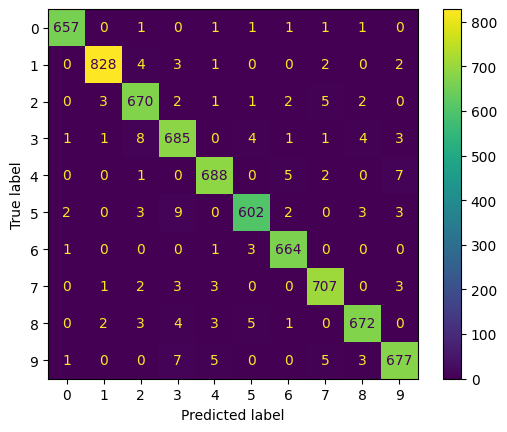

In [14]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, cl.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = arange(10))

cm_display.plot()
plt.show()

#Summary:
accuracy=0.932

10-way cross validation mean time 627s

Training time 62s

Test time 25s